# Bank Failure Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [2]:
df = pd.read_excel(open('Bank failure data.xlsx','rb'), sheet_name='Bank Data')
df.head()

,Bank Name,Quarter,Tier One,Texas,Size,Brokered Deposits,Net Chargeoffs,Constr and Land Dev Loans,Change in Portfolio Mix,NP CRE to Assets,Volatile Liabilities to Assets,Securities,Failed during 2010Q2,Cert Number
0,Exchange Bank,2007Q4,14.90,19.36,32.852108,0.0,0.03,23.13,3.38,0.190681,20.16,99.07,No,160
1,Exchange Bank,2008Q1,14.30,20.86,33.542390,0.0,0.00,32.96,4.96,0.000000,21.23,99.45,No,160
2,Exchange Bank,2008Q2,14.15,20.89,34.140007,0.0,0.31,33.71,1.53,0.022408,19.69,97.94,No,160
3,Exchange Bank,2008Q3,14.13,18.74,34.038758,0.0,-0.02,34.99,3.80,0.147452,19.83,98.84,No,160
4,Exchange Bank,2008Q4,14.21,21.82,34.059328,0.0,1.21,37.14,3.86,0.057306,15.29,99.84,No,160


In [3]:
null_columns = df.columns[df.isnull().any()]
null_columns

Index(['Texas', 'Brokered Deposits', 'Net Chargeoffs'], dtype='object')

In [4]:
print('Desrcriptive statistics')
df.describe()

Desrcriptive statistics


,Tier One,Texas,Size,Brokered Deposits,Net Chargeoffs,Constr and Land Dev Loans,Change in Portfolio Mix,NP CRE to Assets,Volatile Liabilities to Assets,Securities,Cert Number
count,4060.000000,3997.000000,4060.000000,4040.000000,4054.000000,4060.000000,4060.000000,4060.000000,4060.000000,4060.000000,4060.000000
mean,15.818138,29.437163,31.120431,6.209186,1.087743,10.994961,4.912611,0.704697,22.784638,100.652315,22579.123153
std,16.759611,84.947978,14.624115,13.025505,3.312639,11.627024,5.626908,1.325783,11.762271,2.910710,18169.482027
min,-11.510000,0.000000,-6.422059,0.000000,-2.890000,0.000000,0.000000,0.000000,0.000000,80.870000,160.000000
25%,10.190000,3.310000,21.257232,0.000000,0.000000,2.260000,2.110000,0.000000,14.720000,99.870000,9420.000000
50%,12.490000,11.640000,29.022062,0.000000,0.200000,7.505000,3.580000,0.236864,21.350000,100.680000,17840.000000
75%,16.910000,26.040000,39.464289,6.730000,0.880000,15.885000,5.830000,0.818007,28.752500,101.772500,32955.000000
max,334.030000,2388.810000,104.961976,97.640000,106.350000,84.200000,100.000000,22.057423,90.030000,188.700000,91280.000000


In [5]:
from sklearn.preprocessing import Imputer

#imputing the values of missing data
imputer = Imputer(missing_values ='NaN', strategy = 'mean', axis = 0)
df[['Texas','Brokered Deposits','Net Chargeoffs']]=imputer.fit_transform(df[['Texas','Brokered Deposits','Net Chargeoffs']])

null_columns1 = df.columns[df.isnull().any()]
null_columns1

Index([], dtype='object')

In [6]:
df.head()

,Bank Name,Quarter,Tier One,Texas,Size,Brokered Deposits,Net Chargeoffs,Constr and Land Dev Loans,Change in Portfolio Mix,NP CRE to Assets,Volatile Liabilities to Assets,Securities,Failed during 2010Q2,Cert Number
0,Exchange Bank,2007Q4,14.90,19.36,32.852108,0.0,0.03,23.13,3.38,0.190681,20.16,99.07,No,160
1,Exchange Bank,2008Q1,14.30,20.86,33.542390,0.0,0.00,32.96,4.96,0.000000,21.23,99.45,No,160
2,Exchange Bank,2008Q2,14.15,20.89,34.140007,0.0,0.31,33.71,1.53,0.022408,19.69,97.94,No,160
3,Exchange Bank,2008Q3,14.13,18.74,34.038758,0.0,-0.02,34.99,3.80,0.147452,19.83,98.84,No,160
4,Exchange Bank,2008Q4,14.21,21.82,34.059328,0.0,1.21,37.14,3.86,0.057306,15.29,99.84,No,160


## What was the biggest bank at the end of 2009?

In [7]:
df_2009Q4 = df[df['Quarter']=='2009Q4']
print(df_2009Q4[df_2009Q4['Size']==max(df_2009Q4['Size'])]['Bank Name'])
df_2009Q4[df_2009Q4['Size']==max(df_2009Q4['Size'])]

2618    Citibank (South Dakota), N.A.
Name: Bank Name, dtype: object


,Bank Name,Quarter,Tier One,Texas,Size,Brokered Deposits,Net Chargeoffs,Constr and Land Dev Loans,Change in Portfolio Mix,NP CRE to Assets,Volatile Liabilities to Assets,Securities,Failed during 2010Q2,Cert Number
2618,"Citibank (South Dakota), N.A.",2009Q4,12.78,0.15,99.777234,95.78,5.66,0.0,25.28,0.0,18.37,107.54,No,23360


## What trends do you observe in net chargeoffs over time?

In [8]:
#Net Chargeoffs over time - checking the median change over time
df_quarter_median = df.groupby(df['Quarter'])['Net Chargeoffs'].median()

In [9]:
xs = np.sort(df['Quarter'].unique())
def plotsinglegraph(df, xlbl, ylbl, tit):
    plt.style.use('seaborn-darkgrid')
    df[df == 0.0] = np.nan
    df.plot(figsize=(10,5), fontsize = 10, marker='o')
    plt.title(tit, fontsize = 15)
    plt.xlabel(xlbl,fontsize = 15)
    plt.ylabel(ylbl, fontsize = 15)
    idx =xs
    plt.xticks(range(len(idx)),idx)

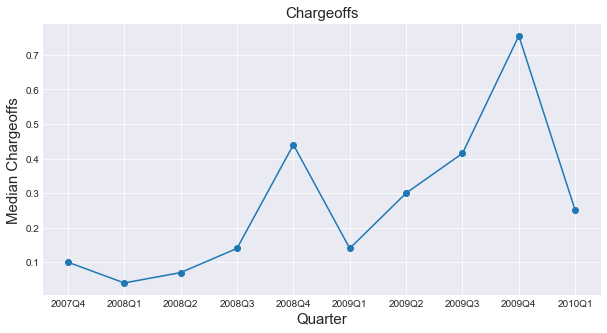

In [10]:
plotsinglegraph(df_quarter_median, 'Quarter', 'Median Chargeoffs', 'Chargeoffs')

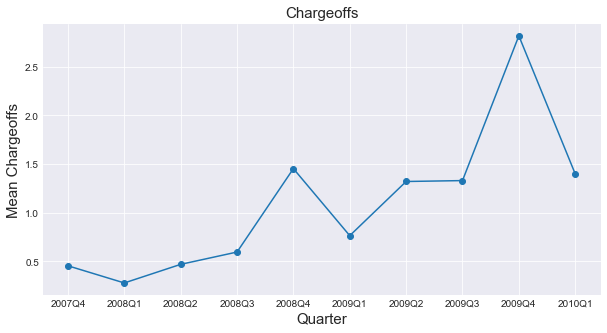

In [11]:
#Net Chargeoffs over time - checking the mean change over time
df_quarter_mean = df.groupby(df['Quarter'])['Net Chargeoffs'].mean()
plotsinglegraph(df_quarter_mean, 'Quarter', 'Mean Chargeoffs', 'Chargeoffs')

We see an increasing trend in net chargeoffs over time. There is a spike in 2008Q4 and then a fall in 2009Q1. This could possibly be because of recession in 2009.

## Is there a correlation between level of profitability of a bank’s investments in securities (here measured by fair value of investments over cost basis) and bank failure?

In [12]:
df['Failed or Not'] = np.where((df['Failed during 2010Q2'] == 'Yes'), 1, 0)

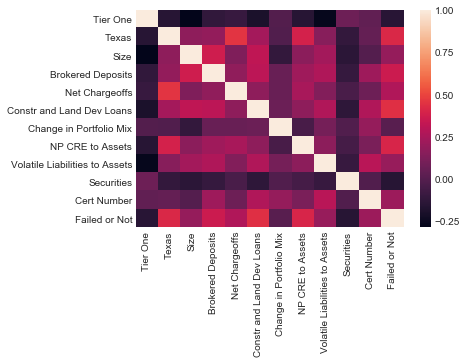

In [13]:
# Heatmap to check correlation
corr = df.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [14]:
df['Securities'].corr(df['Failed or Not'])

-0.1542227378017763

Not very highly correlated if we take the whole sample (i.e. banks who have or haven't failed).

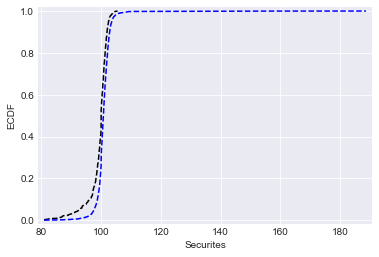

In [15]:
x_values1 = np.sort(df[df['Failed or Not']==1]['Securities'])
x_values2 = np.sort(df[df['Failed or Not']==0]['Securities'])
y_values1 = np.arange(1, len(x_values1)+1)/len(x_values1)
y_values2 = np.arange(1, len(x_values2)+1)/len(x_values2)
fig, ax = plt.subplots()
ax.plot(x_values1, y_values1, 'k--', label='Yes')
ax.plot(x_values2, y_values2, 'b--', label='No')
plt.xlabel('Securites')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()                     

As evident from the graph above, We can see that at any given time, the banks who failed(black line) have lower securities than the banks who did not fail(blue line).

## What are the top two predictors of bank failure?

*Top two predictors*
Texas
Constr and Land Dev Loans


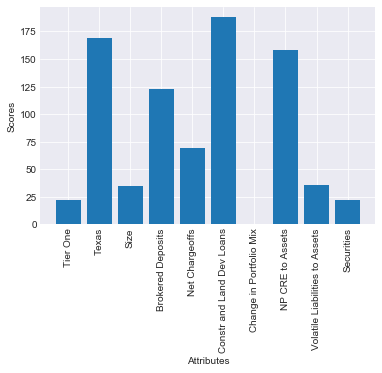

In [16]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn import preprocessing

df_numeric = df._get_numeric_data()
df_numeric = df_numeric.drop(['Failed or Not','Cert Number'], axis =1)
predictors = list(df_numeric.columns)

## Min max feature scaling using MinMaxScaler from sklearn
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(df_numeric)
X = pd.DataFrame(X_scaled)

# Perform feature selection
selector = SelectKBest(f_classif, k=2)
selector.fit_transform(X, df["Failed or Not"])

print("*Top two predictors*")
for i in list(X.columns[selector.get_support(indices=True)].tolist()):
    print(df_numeric.columns[i])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.xlabel('Attributes')
plt.ylabel('Scores')
plt.show()

Top two predictors are: Texas and Construction and Land Development Loans

## Which banks are most likely to fail in the near future (and why)?

In [17]:
df['Year'] = df['Quarter'].str[:4]
max_year = max(df['Year'])

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics, cross_validation

feature_cols = list(df_numeric.columns)
X = df[feature_cols].values
y = df['Failed or Not'].values

## Min max feature scaling using MinMaxScaler from sklearn
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

## instantiate a Linear Regression model and fit to the data
model = LogisticRegression()
score = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = model.fit(X_train, y_train)

crossval_pred = cross_validation.cross_val_predict(model,X_test,y_test, cv=10) 

# print coefficients
print(feature_cols, model.coef_)
print(model.classes_)

score = metrics.accuracy_score(y_test, crossval_pred)
print('Model score (Accuracy):', score)

['Tier One', 'Texas', 'Size', 'Brokered Deposits', 'Net Chargeoffs', 'Constr and Land Dev Loans', 'Change in Portfolio Mix', 'NP CRE to Assets', 'Volatile Liabilities to Assets', 'Securities'] [[-2.89893677  4.66046814  0.35136119  2.8367846   2.37861854  5.66283107
  -0.51233482  6.19866564  1.28599527 -2.43230875]]
[0 1]
Model score (Accuracy): 0.9064039408866995


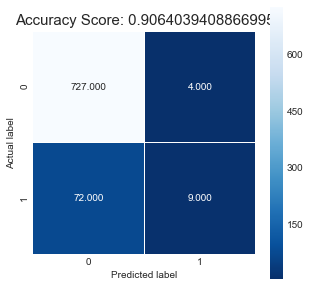

In [29]:
#confusion matrix
cm = confusion_matrix(y_test, crossval_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [30]:
y_new = model.predict_proba(X_test)
top_picks_indexes = -y_new[:,1].argsort()[:5]
df.iloc[top_picks_indexes]

,Bank Name,Quarter,Tier One,Texas,Size,Brokered Deposits,Net Chargeoffs,Constr and Land Dev Loans,Change in Portfolio Mix,NP CRE to Assets,Volatile Liabilities to Assets,Securities,Failed during 2010Q2,Cert Number,Failed or Not,Year
3441,High Desert State Bank,2008Q1,11.43,44.31,24.578474,0.00,0.08,74.36,1.72,0.000000,31.64,100.00,Yes,35279,1,2008
4018,Home Loan State Bank,2009Q4,11.87,2.08,16.117118,14.33,0.71,13.66,14.87,0.000000,23.03,100.74,No,90040,0,2009
3632,Oglethorpe Bank,2008Q2,9.08,14.32,34.042535,8.85,0.41,19.26,8.15,0.000000,32.50,98.63,No,57440,0,2008
3358,Red River Bank,2009Q4,11.80,2.90,47.521313,0.00,0.04,6.94,3.24,0.167234,25.88,101.07,No,34980,0,2009
3891,Americas United Bank,2008Q1,30.89,0.00,23.745358,8.65,0.00,5.59,44.65,0.000000,17.67,102.47,No,58360,0,2008


High Desert State Bank, Home Loan State Bank, Oglethorpe Bank, Red River Bank and Americas United Bank are most likely to fail in the near future because they have low Texas, high Construction and Land Development Loans.

Out of the top 5 banks that will fail, 4 haven't failed yet. These have less texas and high Constr and Land Dev Loans. These were the best two predictors as calculated above and generally it is a trend that banks having more land and high construction loans tend to fail more. Similarly with less Texas, they have a high chance of failing. This pattern can be seen in the banks in my list (analyzed above).

This model is biased though because the number of banks that have failed are very less. And so the model will be skewed towards the banks not failing.